# Дослідження алгоритмів пошуку найкоротшого шляху

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
# Налаштування стилю
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

## Дослідження швидкості пошуку шляху в залежності від довжини маршруту

Маршрут              Відстань (км)   Дейкстри (с)    ALT (с)        
Харків-Полтава       140             5.718           5.419          
Харків-Київ          454             10.907          6.123          
Харків-Одеса         666             17.375          6.143          
Харків-Львів         980             27.695          5.939          

Середній час Дейкстри: 15.424 с
Середній час ALT: 5.906 с
Прискорення ALT порівняно з Дейкстри: 2.61x


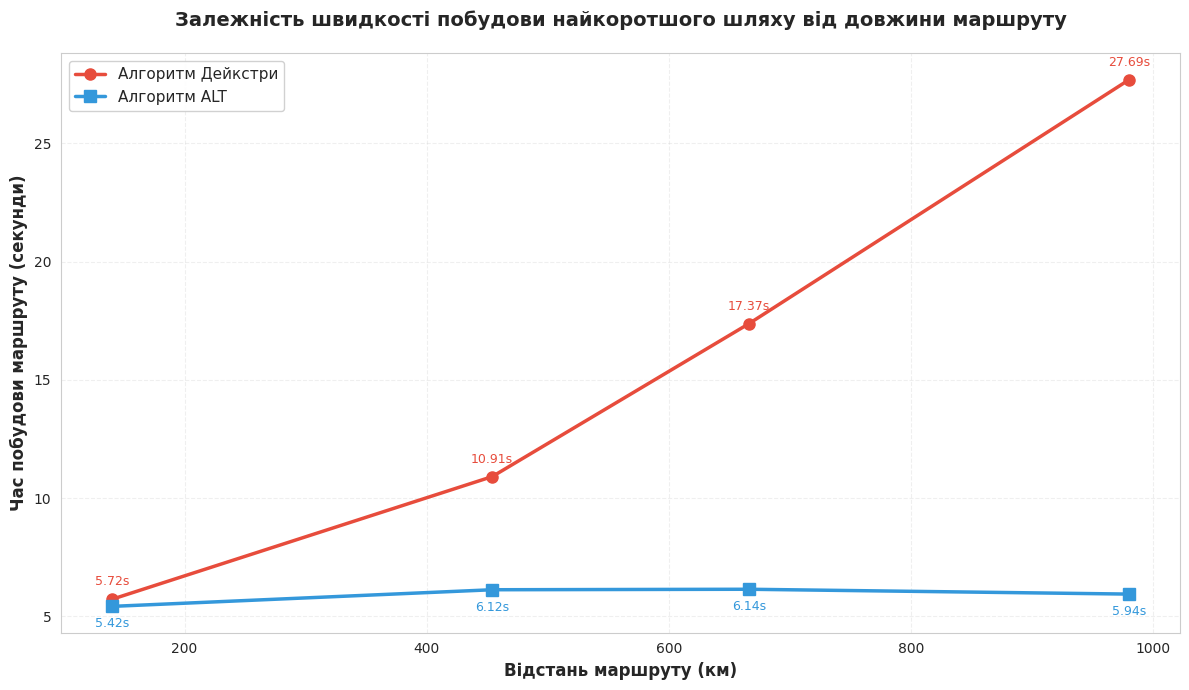

In [5]:
# Вхідні дані
routes = ['Харків-Полтава', 'Харків-Київ', 'Харків-Одеса', 'Харків-Львів']
distances = [140, 454, 666, 980]  # км

# Час в мілісекундах
dijkstra_ms = [5718.445539474487, 10907.013177871704, 17374.762058258057, 27694.6063041687]
alt_ms = [5419.005870819092, 6122.8272914886475, 6143.4736251831055, 5938.951015472412]

# Конвертація мілісекунд в секунди
dijkstra_sec = [ms / 1000 for ms in dijkstra_ms]
alt_sec = [ms / 1000 for ms in alt_ms]

# Створення графіку
fig, ax = plt.subplots(figsize=(12, 7))

# Побудова ліній
ax.plot(distances, dijkstra_sec, marker='o', linewidth=2.5, markersize=8, 
        label='Алгоритм Дейкстри', color='#e74c3c')
ax.plot(distances, alt_sec, marker='s', linewidth=2.5, markersize=8, 
        label='Алгоритм ALT', color='#3498db')

# Налаштування осей
ax.set_xlabel('Відстань маршруту (км)', fontsize=12, fontweight='bold')
ax.set_ylabel('Час побудови маршруту (секунди)', fontsize=12, fontweight='bold')
ax.set_title('Залежність швидкості побудови найкоротшого шляху від довжини маршруту', 
             fontsize=14, fontweight='bold', pad=20)

# Сітка
ax.grid(True, alpha=0.3, linestyle='--')

# Легенда
ax.legend(fontsize=11, loc='upper left', framealpha=0.9)

# Додавання значень на точках
for i, (d, dij, alt) in enumerate(zip(distances, dijkstra_sec, alt_sec)):
    ax.annotate(f'{dij:.2f}s', (d, dij), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='#e74c3c')
    ax.annotate(f'{alt:.2f}s', (d, alt), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, color='#3498db')

# Виведення таблиці з даними
print("=" * 70)
print(f"{'Маршрут':<20} {'Відстань (км)':<15} {'Дейкстри (с)':<15} {'ALT (с)':<15}")
print("=" * 70)
for route, dist, dij, alt in zip(routes, distances, dijkstra_sec, alt_sec):
    print(f"{route:<20} {dist:<15} {dij:<15.3f} {alt:<15.3f}")
print("=" * 70)

# Виведення статистики
print(f"\nСередній час Дейкстри: {np.mean(dijkstra_sec):.3f} с")
print(f"Середній час ALT: {np.mean(alt_sec):.3f} с")
print(f"Прискорення ALT порівняно з Дейкстри: {np.mean(dijkstra_sec)/np.mean(alt_sec):.2f}x")

plt.tight_layout()
plt.show()

## Дослідження швидкості пошуку шляху в залежності від кількості проміжних точок

Проміжні точки       Дейкстри (с)         ALT (с)              Різниця (с)    
1                    26.518               14.222               12.296         
2                    27.750               16.657               11.093         
3                    27.936               15.196               12.740         
4                    26.934               17.766               9.167          
5                    24.699               24.518               0.181          

Середній час Дейкстри: 26.767 с
Середній час ALT: 17.672 с
Середнє прискорення ALT: 1.58x

Тенденція зміни часу:
Дейкстри: від 26.52с до 24.70с (зміна: -1.82с)
ALT: від 14.22с до 24.52с (зміна: 10.30с)


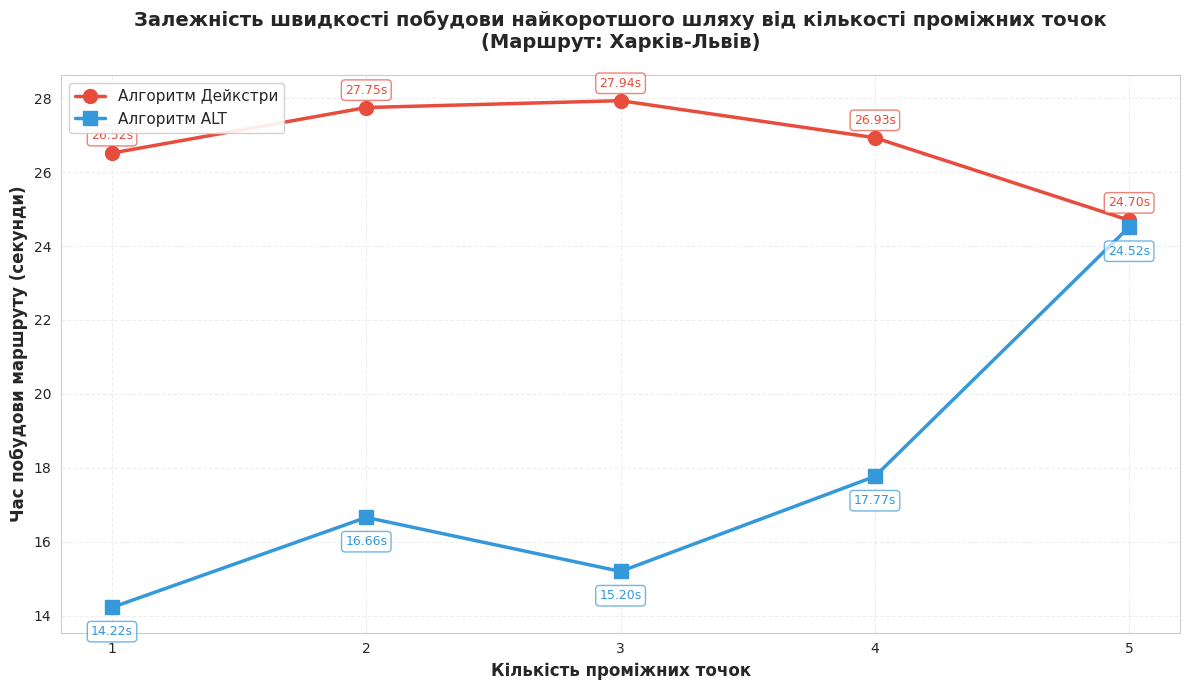

In [6]:
# Вхідні дані - маршрут Харків-Львів
waypoints = [1, 2, 3, 4, 5]  # кількість проміжних точок

# Час в мілісекундах
dijkstra_ms = [26518.054723739624, 27750.458478927612, 27935.66846847534, 
               26933.797597885132, 24699.076414108276]
alt_ms = [14222.093105316162, 16657.158851623535, 15195.528745651245, 
          17766.319274902344, 24518.108129501343]

# Конвертація мілісекунд в секунди
dijkstra_sec = [ms / 1000 for ms in dijkstra_ms]
alt_sec = [ms / 1000 for ms in alt_ms]

# Створення графіку
fig, ax = plt.subplots(figsize=(12, 7))

# Побудова ліній
ax.plot(waypoints, dijkstra_sec, marker='o', linewidth=2.5, markersize=10, 
        label='Алгоритм Дейкстри', color='#e74c3c', linestyle='-')
ax.plot(waypoints, alt_sec, marker='s', linewidth=2.5, markersize=10, 
        label='Алгоритм ALT', color='#3498db', linestyle='-')

# Налаштування осей
ax.set_xlabel('Кількість проміжних точок', fontsize=12, fontweight='bold')
ax.set_ylabel('Час побудови маршруту (секунди)', fontsize=12, fontweight='bold')
ax.set_title('Залежність швидкості побудови найкоротшого шляху від кількості проміжних точок\n(Маршрут: Харків-Львів)', 
             fontsize=14, fontweight='bold', pad=20)

# Встановлення цілих значень на осі X
ax.set_xticks(waypoints)

# Сітка
ax.grid(True, alpha=0.3, linestyle='--')

# Легенда
ax.legend(fontsize=11, loc='upper left', framealpha=0.9)

# Додавання значень на точках
for i, (w, dij, alt) in enumerate(zip(waypoints, dijkstra_sec, alt_sec)):
    ax.annotate(f'{dij:.2f}s', (w, dij), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='#e74c3c', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#e74c3c', alpha=0.7))
    ax.annotate(f'{alt:.2f}s', (w, alt), textcoords="offset points", 
                xytext=(0,-20), ha='center', fontsize=9, color='#3498db',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#3498db', alpha=0.7))

# Виведення таблиці з даними
print("=" * 75)
print(f"{'Проміжні точки':<20} {'Дейкстри (с)':<20} {'ALT (с)':<20} {'Різниця (с)':<15}")
print("=" * 75)
for w, dij, alt in zip(waypoints, dijkstra_sec, alt_sec):
    diff = dij - alt
    print(f"{w:<20} {dij:<20.3f} {alt:<20.3f} {diff:<15.3f}")
print("=" * 75)

# Виведення статистики
print(f"\nСередній час Дейкстри: {np.mean(dijkstra_sec):.3f} с")
print(f"Середній час ALT: {np.mean(alt_sec):.3f} с")
print(f"Середнє прискорення ALT: {np.mean([d/a for d, a in zip(dijkstra_sec, alt_sec)]):.2f}x")

# Аналіз тенденції
print(f"\nТенденція зміни часу:")
print(f"Дейкстри: від {dijkstra_sec[0]:.2f}с до {dijkstra_sec[-1]:.2f}с (зміна: {dijkstra_sec[-1]-dijkstra_sec[0]:.2f}с)")
print(f"ALT: від {alt_sec[0]:.2f}с до {alt_sec[-1]:.2f}с (зміна: {alt_sec[-1]-alt_sec[0]:.2f}с)")

plt.tight_layout()
plt.show()

## Дослідження швидкості пошуку шляху в залежності від кількості загроз на карті

Кількість загроз     Дейкстри (с)         ALT (с)              Різниця (с)         
1                    27.077               44.337               -17.260              (Дейкстри швидше)
2                    43.791               34.595               +9.196               (ALT швидше)
3                    44.911               34.756               +10.155              (ALT швидше)
4                    58.456               39.424               +19.032              (ALT швидше)
5                    52.263               44.023               +8.240               (ALT швидше)

Середній час Дейкстри: 45.300 с
Середній час ALT: 39.427 с

Порівняння ефективності:
1 загроз(а): Дейкстри швидше в 1.64x разів
2 загроз(а): ALT швидше в 1.27x разів
3 загроз(а): ALT швидше в 1.29x разів
4 загроз(а): ALT швидше в 1.48x разів
5 загроз(а): ALT швидше в 1.19x разів

Тенденція зміни часу:
Дейкстри: від 27.08с до 52.26с (збільшення: 25.19с, +93.0%)
ALT: від 44.34с до 44.02с (зміна: -0.31с, -0.7%)

Точка зміни 

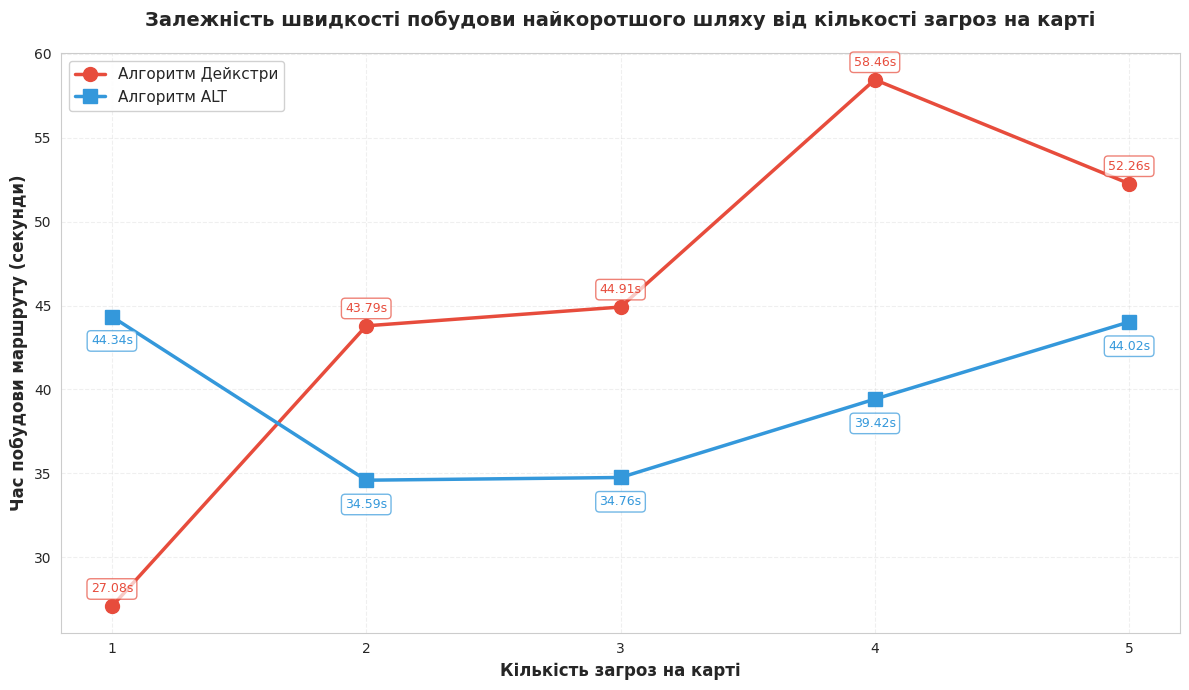

In [8]:
# Вхідні дані - загрози на карті
threats = [1, 2, 3, 4, 5]  # кількість загроз

# Час в мілісекундах
dijkstra_ms = [27077.126502990723, 43791.09501838684, 44910.97927093506, 
               58455.8961391449, 52263.01336288452]
alt_ms = [44337.41760253906, 34594.839572906494, 34755.929708480835, 
          39424.29780960083, 44023.13137054443]

# Конвертація мілісекунд в секунди
dijkstra_sec = [ms / 1000 for ms in dijkstra_ms]
alt_sec = [ms / 1000 for ms in alt_ms]

# Створення графіку
fig, ax = plt.subplots(figsize=(12, 7))

# Побудова ліній
ax.plot(threats, dijkstra_sec, marker='o', linewidth=2.5, markersize=10, 
        label='Алгоритм Дейкстри', color='#e74c3c', linestyle='-')
ax.plot(threats, alt_sec, marker='s', linewidth=2.5, markersize=10, 
        label='Алгоритм ALT', color='#3498db', linestyle='-')

# Налаштування осей
ax.set_xlabel('Кількість загроз на карті', fontsize=12, fontweight='bold')
ax.set_ylabel('Час побудови маршруту (секунди)', fontsize=12, fontweight='bold')
ax.set_title('Залежність швидкості побудови найкоротшого шляху від кількості загроз на карті', 
             fontsize=14, fontweight='bold', pad=20)

# Встановлення цілих значень на осі X
ax.set_xticks(threats)

# Сітка
ax.grid(True, alpha=0.3, linestyle='--')

# Легенда
ax.legend(fontsize=11, loc='upper left', framealpha=0.9)

# Додавання значень на точках
for i, (t, dij, alt) in enumerate(zip(threats, dijkstra_sec, alt_sec)):
    ax.annotate(f'{dij:.2f}s', (t, dij), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='#e74c3c', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#e74c3c', alpha=0.7))
    ax.annotate(f'{alt:.2f}s', (t, alt), textcoords="offset points", 
                xytext=(0,-20), ha='center', fontsize=9, color='#3498db',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#3498db', alpha=0.7))

# Виведення таблиці з даними
print("=" * 85)
print(f"{'Кількість загроз':<20} {'Дейкстри (с)':<20} {'ALT (с)':<20} {'Різниця (с)':<20}")
print("=" * 85)
for t, dij, alt in zip(threats, dijkstra_sec, alt_sec):
    diff = dij - alt
    status = "Дейкстри швидше" if diff < 0 else "ALT швидше"
    print(f"{t:<20} {dij:<20.3f} {alt:<20.3f} {diff:<+20.3f} ({status})")
print("=" * 85)

# Виведення статистики
print(f"\nСередній час Дейкстри: {np.mean(dijkstra_sec):.3f} с")
print(f"Середній час ALT: {np.mean(alt_sec):.3f} с")

# Порівняння по кожній кількості загроз
print(f"\nПорівняння ефективності:")
for t, dij, alt in zip(threats, dijkstra_sec, alt_sec):
    if dij < alt:
        ratio = alt / dij
        print(f"{t} загроз(а): Дейкстри швидше в {ratio:.2f}x разів")
    else:
        ratio = dij / alt
        print(f"{t} загроз(а): ALT швидше в {ratio:.2f}x разів")

# Аналіз тенденції
print(f"\nТенденція зміни часу:")
print(f"Дейкстри: від {dijkstra_sec[0]:.2f}с до {dijkstra_sec[-1]:.2f}с (збільшення: {dijkstra_sec[-1]-dijkstra_sec[0]:.2f}с, +{((dijkstra_sec[-1]/dijkstra_sec[0])-1)*100:.1f}%)")
print(f"ALT: від {alt_sec[0]:.2f}с до {alt_sec[-1]:.2f}с (зміна: {alt_sec[-1]-alt_sec[0]:.2f}с, {((alt_sec[-1]/alt_sec[0])-1)*100:.1f}%)")

# Точка перетину
print(f"\nТочка зміни ефективності:")
print(f"При 1 загрозі: Дейкстри швидше на {alt_sec[0]-dijkstra_sec[0]:.2f}с")
print(f"При 2+ загрозах: ALT стає ефективнішим")

plt.tight_layout()
plt.show()